In [ ]:
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
dataset=drive.CreateFile({'id':'1bFQuVJlR6Ox6u96XKlUXVuR7r4zMHrj1'})
dataset.GetContentFile('train_csv.csv')

#dataset=drive.CreateFile({'id':'1FQVm2dFr6a-nzvf5AzA5eFUKxuQ_J7Mf'})
#dataset.GetContentFile('test_csv.csv')
#https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
import pandas as pd
dataset = pd.read_csv('train_csv.csv') 
dataset = dataset.sample(frac=1).reset_index(drop=True)
#abc = pd.read_csv('test_csv.csv') 

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



(8000, 324)
(8000, 2)
(2000, 2)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


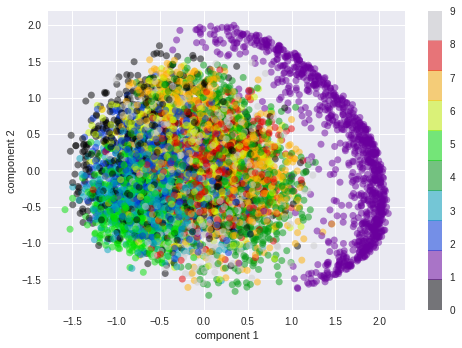

In [ ]:
from sklearn.decomposition import PCA,KernelPCA
import matplotlib.pyplot as plt

kpca = PCA(n_components=2)
X_ktrain = kpca.fit_transform(X_train)
X_ktest = kpca.transform(X_test)

print(X_train.shape)
print(X_ktrain.shape)
print(X_ktest.shape)

plt.scatter(X_ktrain[:, 0], X_ktrain[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


(8000, 324)
(8000, 2)
(2000, 2)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


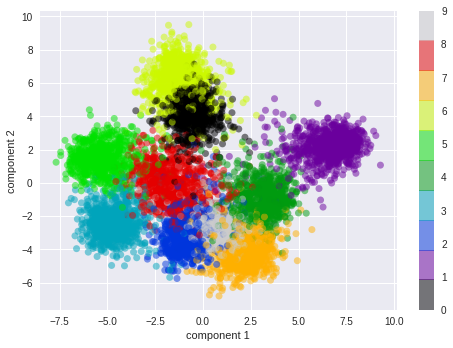

In [ ]:
#LDA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_train = lda.fit_transform(X_train,y_train)
X_lda_test = lda.transform(X_test)

print(X_train.shape)
print(X_lda_train.shape)
print(X_lda_test.shape)

plt.scatter(X_lda_train[:, 0], X_lda_train[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
from sklearn import manifold
from sklearn import svm
from sklearn.svm import SVC


iso = manifold.Isomap(n_neighbors=20, n_components=13)
X_iso_train=iso.fit_transform(X_train)
X_iso_test=iso.transform(X_test)

print(X_train.shape)
print(X_iso_train.shape)
print(X_iso_test.shape)

plt.scatter(X_iso_train[:, 0], X_iso_train[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
#LDA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 8)
#X_train=X_train.astype('int')
#y_train=y_train.astype('int')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
svc = svm.SVC(kernel='rbf',C=2)
svc.fit(X_train, y_train)
#y_pred_svm = svc.predict(X_test)
print("done!")
#print(y_train)
#print("Accuracy"+ str(accuracy_score(y_test,y_pred_svm)))
#p=accuracy_score(y_test,y_pred_svm)
p=svc.score(X_test,y_test)
print("Accuracy"+ str(p))


/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier.predict(X_test)
#print(y_pred_lr)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
#print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr))

0.983


In [ ]:
#K Fold
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
kf = KFold(n_splits=8,shuffle=True)
sum = 0
for train, test in kf.split(dataset):
    train_data = np.array(dataset)[train]
    test_data = np.array(dataset)[test]
    X_train = train_data[...,:-1]
    y_train = train_data[...,-1]
    X_test  = test_data[...,:-1]
    y_test  = test_data[...,-1]
    
    pca = PCA(n_components=50,whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    svc = svm.SVC(kernel='rbf',C=2)
    svc.fit(X_train, y_train)
    #y_pred_svm = svc.predict(X_test)
    print("done!")
    #print(y_train)
    #print("Accuracy"+ str(accuracy_score(y_test,y_pred_svm)))
    #p=accuracy_score(y_test,y_pred_svm)
    p=svc.score(X_test,y_test)
    print("Accuracy"+ str(p))
    sum = sum + p
average = sum/8
print(average)


#svc = svm.SVC(kernel='rbf',C=2)
#svc.fit(X_train, y_train)
#print("done!")
'''scores = cross_val_score(svc, X_train, y_train, cv=5)
#print(scores)'''
'''from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(svc, X_test, y_test, cv=10)
print(accuracy_score(y_test, predicted))'''
#y_pred_svm = svc.predict(X_test)

#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test,y_pred_svm))
#rrun korcho?



done!
Accuracy0.9709878810135879
done!
Accuracy0.9651120088138083
done!
Accuracy0.961439588688946
done!
Accuracy0.9603378626514874
done!
Accuracy0.9665686994856723
done!
Accuracy0.9625275532696547
done!
Accuracy0.9695077149155034
done!
Accuracy0.9603232916972814
0.9646005750669927


'from sklearn.model_selection import cross_val_predict\npredicted = cross_val_predict(svc, X_test, y_test, cv=10)\nprint(accuracy_score(y_test, predicted))'

In [ ]:
#run korcho ki?
#hmm...99 cross kore geche cv te
#aper ##eta ki bolle bujhlam na
#paper e cross validation results dawa jabe na i think...tor code cross validation eita
#pca_new te jerom train test split kora ache.....serom hbe i guess.......60k train file......ar testing 10k file e
#duto alada csv read kore
#bujhli?


#hmm bujhlam
#upload kore diyechi 60k file...dekh.....jerom jerom csv generate korbo.......upload kore debo csv_for_paper folder e ..ok
#time note korte hbe process er o.....toke kichu khon e paper e ki table dawa jaabe........draw kore whatsapp kore debo
#ok
#onno dr dekh
#onno dataset dekhi ami
#achcha
#e kintu cv hobe na i think.....train test hbe.......train 60k...test 10k
#99.1% accuracy 60k teseparate kono notebook e??
#ami changes dekhte pachchi na
#tor net slow mone hochche....comments o lag korchilo

##opor er cell ei to chollo....results ekhono ache
#hm eseche 


#icdar dataset nile hoye....98% ashlo
#baah bhalo toh

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


Text(0,0.5,'Component wise explained variance')

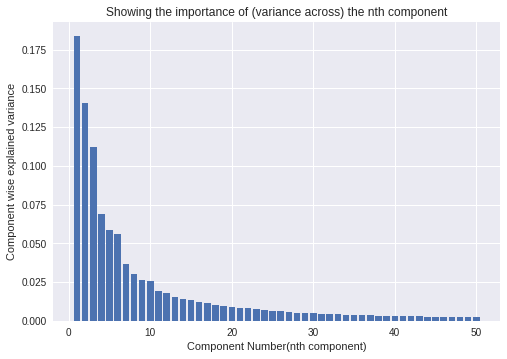

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=50)
n_components= np.arange(1,51,1)
print(n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(pca.explained_variance_ratio_)
plt.bar(n_components,height=pca.explained_variance_ratio_)

plt.title("Showing the importance of (variance across) the nth component")
plt.xlabel('Component Number(nth component)')
plt.ylabel('Component wise explained variance')

Text(0,0.5,'Cumulative explained variance')

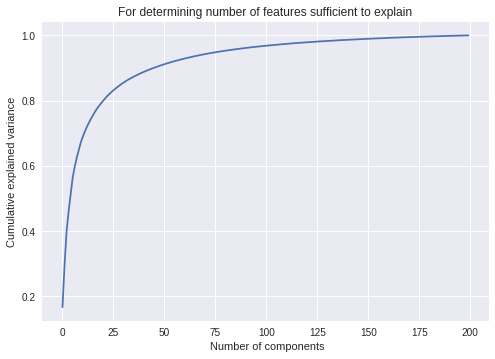

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=200)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(pca.explained_variance_ratio_)
#plt.bar(n_components,height=pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("For determining number of features sufficient to explain")
plt.xlabel(' Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
#Stratified KFold
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
skf = StratifiedKFold(n_splits=8,shuffle=True)
sum = 0
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

for train, test in skf.split(X,y):
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  
    
  pca = PCA(n_components=50,whiten=True)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  svc = svm.SVC(kernel='rbf',C=2)
  svc.fit(X_train, y_train)
  #y_pred_svm = svc.predict(X_test)
  print("done!")
  #print(y_train)
  #print("Accuracy"+ str(accuracy_score(y_test,y_pred_svm)))
  #p=accuracy_score(y_test,y_pred_svm)
  p=svc.score(X_test,y_test)
  print("Accuracy"+ str(p))
  sum = sum + p
average = sum/8
print(average)


done!
Accuracy0.9880382775119617
done!
Accuracy0.9904229848363927
done!
Accuracy0.9912140575079872
done!
Accuracy0.9896166134185304
done!
Accuracy0.9895916733386709
done!
Accuracy0.9903923138510808
done!
Accuracy0.9847512038523274
done!
Accuracy0.9855421686746988
0.9886961616239562


In [ ]:
#KernalPCA

#Stratified KFold
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
skf = StratifiedKFold(n_splits=8,shuffle=True)
sum = 0
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

for train, test in skf.split(X,y):
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  
    
  kpca=KernelPCA(n_components=10,kernel='rbf')
  X_kpca=kpca.fit_transform(X_train)
  #X_back=kpca.fit_inverse_transform(X_kpca)
  X_test_kpca=kpca.transform(X_test)

  svc = svm.SVC(kernel='rbf',C=2)
  svc.fit(X_kpca, y_train)
  #y_pred_svm = svc.predict(X_test)
  print("done!")
  #print(y_train)
  #print("Accuracy"+ str(accuracy_score(y_test,y_pred_svm)))
  #p=accuracy_score(y_test,y_pred_svm)
  p=svc.score(X_test_kpca,y_test)
  print("Accuracy"+ str(p))
  sum = sum + p
average = sum/8
print(average)



In [ ]:
#KernalPCA

#Stratified KFold
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
skf = StratifiedKFold(n_splits=8,shuffle=True)
sum = 0
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

for train, test in skf.split(X,y):
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  
    
  kpca=KernelPCA(n_components=15,kernel='rbf')
  X_kpca=kpca.fit_transform(X_train)
  #X_back=kpca.fit_inverse_transform(X_kpca)
  X_test_kpca=kpca.transform(X_test)

  svc = svm.SVC(kernel='rbf',C=2)
  svc.fit(X_kpca, y_train)
  #y_pred_svm = svc.predict(X_test)
  print("done!")
  #print(y_train)
  #print("Accuracy"+ str(accuracy_score(y_test,y_pred_svm)))
  #p=accuracy_score(y_test,y_pred_svm)
  p=svc.score(X_test_kpca,y_test)
  print("Accuracy"+ str(p))
  sum = sum + p
average = sum/8
print(average)



done!
Accuracy0.9226475279106858
done!
Accuracy0.9305666400638468
done!
Accuracy0.9201277955271565
done!
Accuracy0.9249201277955271
done!
Accuracy0.9311449159327462
done!
Accuracy0.9311449159327462
done!
Accuracy0.9173354735152488
done!
Accuracy0.9253012048192771
0.9253985751871544


In [ ]:
#TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import svm

svd=TruncatedSVD(n_components=8,n_iter=7)
X_svd_train=svd.fit_transform(X_train)
X_svd_test=svd.transform(X_test)
svc_svd=svm.SVC(kernel='rbf',C=13)
svc_svd.fit(X_svd_train,y_train)
svd_score=svc_svd.score(X_svd_test,y_test)
print(svd_score)




0.932


In [ ]:
#IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn import svm

svd=IncrementalPCA(n_components=24)
X_svd_train=svd.fit_transform(X_train)
X_svd_test=svd.transform(X_test)
svc_svd=svm.SVC(kernel='rbf',C=10)
svc_svd.fit(X_svd_train,y_train)
svd_score=svc_svd.score(X_svd_test,y_test)
print(svd_score)


0.9785


In [ ]:
#TruncatedSVD

#Stratified KFold
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
skf = StratifiedKFold(n_splits=8,shuffle=True)
sum = 0
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

for train, test in skf.split(X,y):
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  
    
  svd=TruncatedSVD(n_components=8,n_iter=7)
  X_svd_train=svd.fit_transform(X_train)
  X_svd_test=svd.transform(X_test)
  svc_svd=svm.SVC(kernel='rbf',C=13)
  svc_svd.fit(X_svd_train,y_train)
  svd_score=svc_svd.score(X_svd_test,y_test)
 

  print("Accuracy"+ str(svd_score))
  sum = sum + svd_score
average = sum/8
print(average)

Accuracy0.9362041467304625
Accuracy0.9409417398244214
Accuracy0.9408945686900958
Accuracy0.9353035143769968
Accuracy0.9439551641313051
Accuracy0.9431545236188951
Accuracy0.9365971107544141
Accuracy0.9365461847389558
0.9391996191081933


In [ ]:
#cross validation
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)
pca = PCA(n_components=14)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()
clf.fit(X_t_train, y_train)
print 'score', clf.score(X_t_test, y_test)
print 'pred label', clf.predict(X_t_test)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


score 0.9273333333333333
pred label [2 7 9 ... 3 4 5]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred_g=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_g))

0.845


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

0.965


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(100, 50), random_state=1)
#start_time = time.time()
clf.fit(X_train,y_train)
y_pred_mlp=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_mlp))

#print("--- %s seconds ---" % (time.time() - start_time))

0.879


ValueError: ignored

In [ ]:
#Feature Selection
#Recursive Elimination

from sklearn.feature_selection import RFE
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit_transform(X_train, y_train)
rfe_score=rfe.score(X_test,y_test)
print(rfe_score)

0.8745


In [ ]:
from sklearn import manifold
from sklearn import svm
from sklearn.svm import SVC


iso = manifold.Isomap(n_neighbors=20, n_components=13)
X_iso_train=iso.fit_transform(X_train)
X_iso_test=iso.transform(X_test)
svc_iso=svm.SVC(kernel='rbf')
svc_iso.fit(X_iso_train,y_train)
iso_score=svc_iso.score(X_iso_test,y_test)
print(iso_score)


0.9805


In [ ]:
print(iso_score)

0.882


In [ ]:
from sklearn import manifold
from sklearn import svm
from sklearn.svm import SVC


iso = manifold.MDS(n_components=2)
X_iso_train=iso.fit_transform(X_train)
X_iso_test=iso.transform(X_test,)
print(X_iso)
#svc_iso=svm.SVC(kernel='rbf')
#svc_iso.fit(X_iso_train)
#iso_score=svc_iso.score(X_iso_test)
#print(iso_score)

